# Load necessary library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors

# Clustering

## Create a function for the elbow method

In [15]:
# ELBOW METHOD
def elbowmethod(data):
    x = data  # <your_data>
    distorsions = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        distorsions.append(kmeans.inertia_)

    plt.plot(range(1, 10), distorsions, 'bo-')
    plt.grid(True)
    plt.ylabel("Square Root Error")
    plt.xlabel("Number of Clusters")
    plt.title(f"Elbow Method" + " - " + str(data.columns))
    plt.show()

In [72]:
# EVALUATE CLUSTERING
def evaluate_clustering(labels_pred, data):
    silhouette = silhouette_score(data, labels_pred) if len(np.unique(labels_pred)) > 1 else 0
    davies_bouldin = davies_bouldin_score(data, labels_pred)
    calinski_harabasz = calinski_harabasz_score(data, labels_pred)

    return {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Index": calinski_harabasz
    }

In [73]:
# CLUSTERING KMEANS
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit_transform(data)
    labels = kmeans.labels_
    return labels, evaluate_clustering(labels, data)

In [74]:
# CLUSTERING DBSCAN
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels, evaluate_clustering(labels, data)

## Load the data

In [16]:
with open(r"C:\Users\VY\Downloads\normalized_variables.csv") as f:
    df_normalized = pd.read_csv(f)

In [17]:
df_normalized.head()

,Unnamed: 0,postal_code,Weighted_Average_Age,Standard_Deviation_Age,prop_0-14,prop_15-24,prop_25-44,prop_45-64,prop_65+,prop_university,worker,prop_women,pop_density,livability_score,Aid,Income,single_family_housing
0,0,340101,47.443038,21.552028,0.098101,0.094937,0.253165,0.199367,0.357595,0.170886,0.177215,0.534810,0.085318,8.226781,0.058480,0.119906,0.03
1,1,340102,40.202797,21.803908,0.180070,0.101399,0.283217,0.239510,0.197552,0.171329,0.195804,0.517483,0.158171,7.931987,0.140351,0.103448,0.65
2,2,340201,40.317560,19.234362,0.116719,0.096740,0.401682,0.223975,0.159832,0.319664,0.263933,0.481598,0.157137,8.070317,0.198830,0.170063,0.01
3,3,340202,39.320709,20.525905,0.150527,0.157718,0.244487,0.316874,0.130393,0.246405,0.194631,0.512464,0.137107,8.062306,0.345029,0.163009,0.68
4,4,340203,36.697898,19.934602,0.181261,0.155867,0.268827,0.316112,0.078809,0.182137,0.229422,0.496497,0.245857,7.932075,0.187135,0.137931,0.83


## KMeans Clustering

### Age Clustering

In [18]:
#Extract the age columns
age_df_cluster_distribution = df_normalized.loc[:, 'Weighted_Average_Age':'Standard_Deviation_Age']
age_df_cluster_distribution

,Weighted_Average_Age,Standard_Deviation_Age
0,47.443038,21.552028
1,40.202797,21.803908
2,40.317560,19.234362
3,39.320709,20.525905
4,36.697898,19.934602
...,...,...
957,38.842905,20.597952
958,35.979042,19.471641
959,43.046154,21.198026
960,41.746647,20.991594


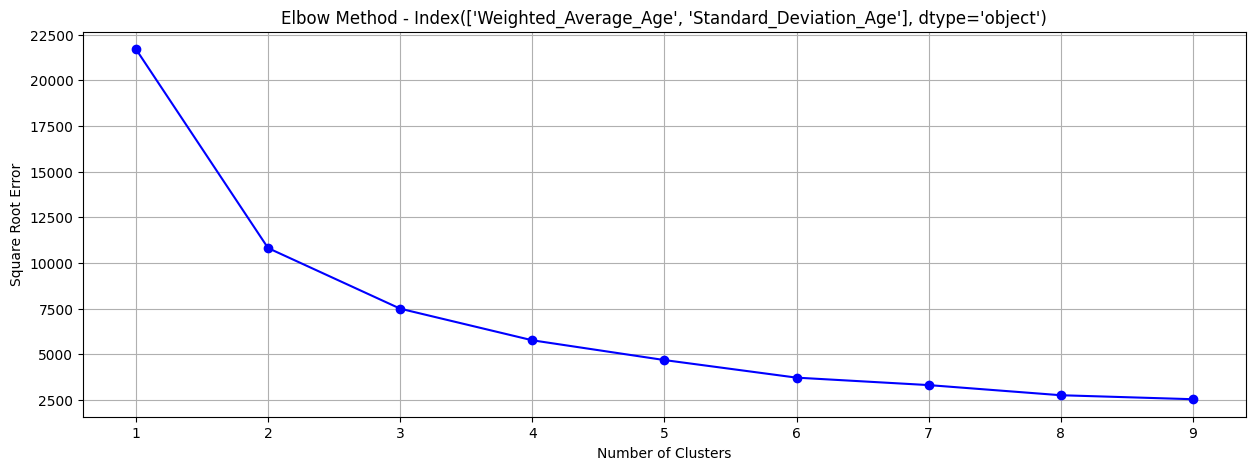

In [20]:
# Elbow method
elbowmethod(age_df_cluster_distribution)

In [62]:
kmeans_clustering(age_df_cluster_distribution, 4)

(array([1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 3, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1,
        1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0,
        1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
        0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2,
        3, 0, 0, 2, 2, 3, 0, 3, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0,
        0, 0, 2, 2, 0, 0, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0,
        2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3,
        2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2,
        2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1,
        2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3,
        2, 2, 2, 3, 1, 0, 0, 0, 0, 0, 

In [63]:
# Save the label output 
df_normalized['age_labels']= kmeans_clustering(age_df_cluster_distribution, 4)[0]

### Social Clustering

In [65]:
# Extract the social columns
social_df = df_normalized.loc[:,['prop_university', 'worker', 'Income']]
social_df

,prop_university,worker,Income
0,0.170886,0.177215,0.119906
1,0.171329,0.195804,0.103448
2,0.319664,0.263933,0.170063
3,0.246405,0.194631,0.163009
4,0.182137,0.229422,0.137931
...,...,...,...
957,0.165541,0.222973,0.090909
958,0.227545,0.221557,0.087774
959,0.295385,0.169231,0.174765
960,0.211624,0.195231,0.123041


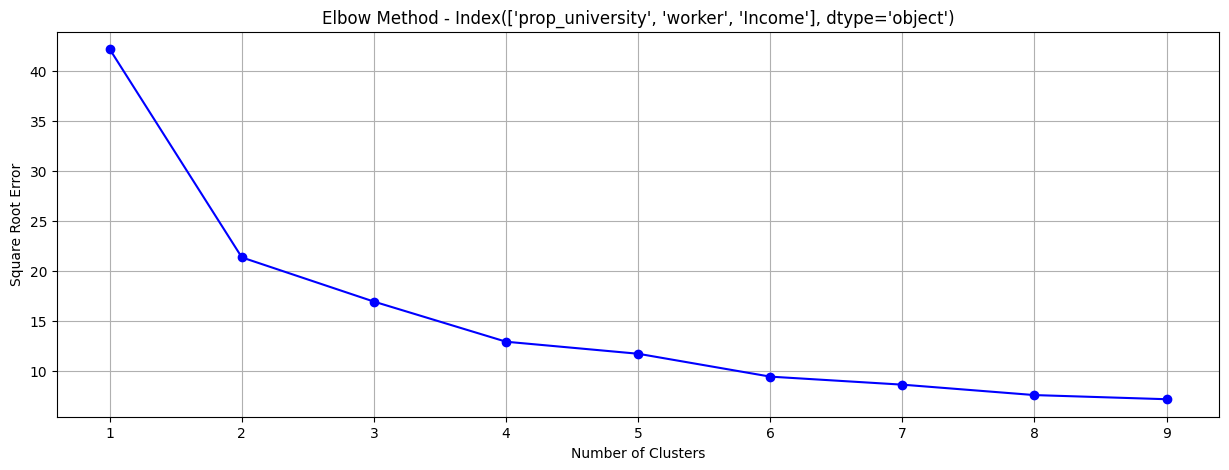

In [27]:
# Elbow method
elbowmethod(social_df)

In [66]:
# KMeans Clustering
kmeans_clustering(social_df, 4)

(array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 3,
        0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0,
        0, 0, 3, 0, 3, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3,
        3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 2, 2,
        0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3,
        3, 0, 3, 3, 3, 3, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3,
        0, 2, 2, 2, 1, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
        0, 0, 2, 0, 3, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0,
        0, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 3, 3,
        3, 0, 0, 2, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2,
        0, 3, 3, 2, 0, 2, 0, 2, 2, 2, 

In [67]:
# Save the label output
df_normalized['social_labels'] = kmeans_clustering(social_df, 4)[0]

### Demographic Clustering

In [68]:
# Extract the demographic columns
demographic_df = df_normalized.loc[:, ['pop_density','Aid','prop_women']]
demographic_df

,pop_density,Aid,prop_women
0,0.085318,0.058480,0.534810
1,0.158171,0.140351,0.517483
2,0.157137,0.198830,0.481598
3,0.137107,0.345029,0.512464
4,0.245857,0.187135,0.496497
...,...,...,...
957,0.259273,0.122807,0.498311
958,0.266512,0.081871,0.517964
959,0.137488,0.093567,0.492308
960,0.126140,0.128655,0.511177


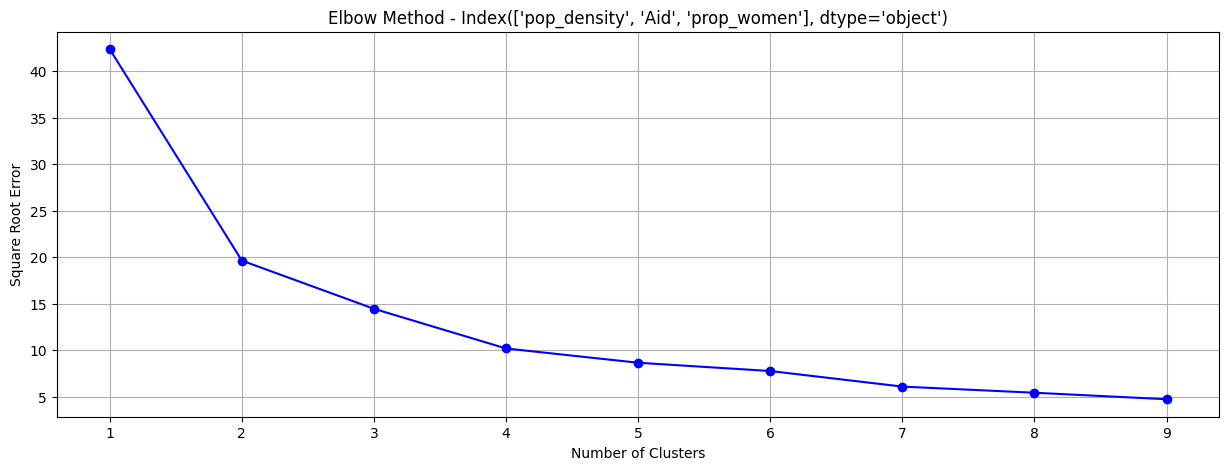

In [31]:
# Elbow method
elbowmethod(demographic_df)

In [69]:
# KMeans Clustering
kmeans_clustering(demographic_df, 2)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

In [70]:
# Save the label output
df_normalized['demographic_labels'] = kmeans_clustering(demographic_df, 2)[0]

# DBSCAN Clustering

### Age Clustering

In [49]:
# The min_samples is 2 * dim the number of features, for age data, it is 2 * 2 = 4
# We continue to find the epsilon
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit_age = neighbors.fit(age_df_cluster_distribution)
distances_age, indices_age = neighbors_fit_age.kneighbors(age_df_cluster_distribution)

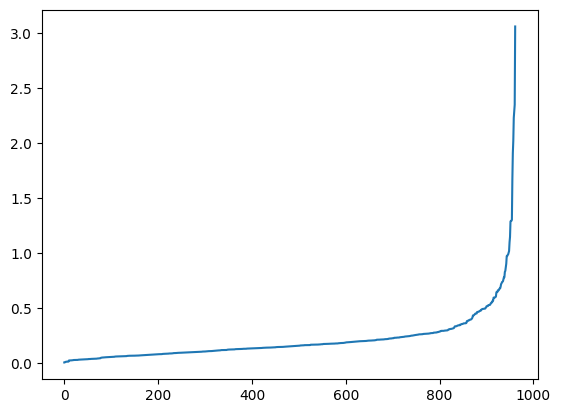

In [50]:
distances_age = np.sort(distances_age, axis=0)
distances_age = distances_age[:,1]
plt.plot(distances_age)

In [51]:
dbscan_clustering(age_df_cluster_distribution, 0.6, 4)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
         0, -1,  0, -1,  0,  0, -1, -1,  0,  1,  0,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [75]:
# Save the label output
df_normalized['age_labels_dbscan'] = dbscan_clustering(age_df_cluster_distribution, 0.6, 4)[0]

### Social Clustering

In [76]:
neighbors_fit_social = neighbors.fit(social_df)
distances_social, indices_social = neighbors_fit_social.kneighbors(social_df)

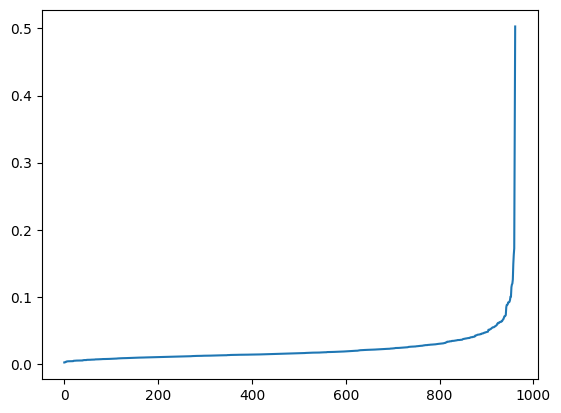

In [77]:
distances_social = np.sort(distances_social, axis=0)
distances_social = distances_social[:,1]
plt.plot(distances_social)

In [78]:
dbscan_clustering(social_df, 0.1, 4)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [79]:
# Save the label output
df_normalized['social_labels_dbscan'] = dbscan_clustering(social_df, 0.1, 4)[0]

### Demographic Clustering

In [80]:
neighbors_fit_demographic = neighbors.fit(demographic_df)
distances_demographic, indices_demographic = neighbors_fit_demographic.kneighbors(demographic_df)

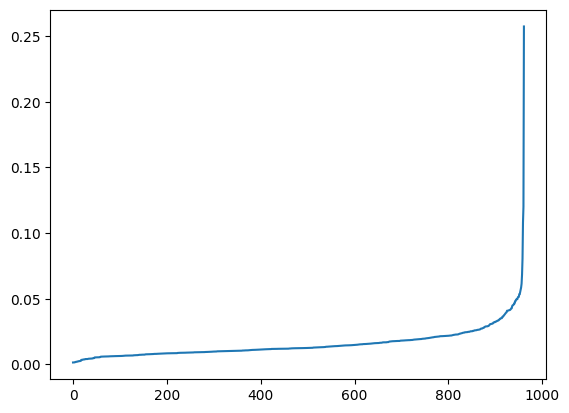

In [81]:
distances_demographic = np.sort(distances_demographic, axis=0)
distances_demographic = distances_demographic[:,1]
plt.plot(distances_demographic)

In [82]:
dbscan_clustering(demographic_df, 0.06, 4)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [83]:
# Save the label output
df_normalized['demographic_labels_dbscan'] = dbscan_clustering(demographic_df, 0.06, 4)[0]

# Save the output

In [84]:
df_normalized.to_csv(r"C:\Users\VY\Downloads\df_normalized_clustering_output.csv", index=False)